# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Memuat dataset hasil clustering
file_path = '/content/drive/MyDrive/Dataset Clustering/hasil_clustering.csv'
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Dataset yang Dimuat:")
print(dataset.head())

Dataset yang Dimuat:
   TransactionID  AccountID  TransactionAmount  TransactionDate  \
0              0        126          -0.971275              620   
1              1        449           0.269440             1088   
2              2         18          -0.586882             1166   
3              3         68          -0.387456              746   
4              4        405          -0.973468             1786   

   TransactionType  Location  DeviceID  IP Address  MerchantID  Channel  \
0                1        36       364         185          14        0   
1                1        15        50          81          51        0   
2                1        23       229         342           8        2   
3                1        33       182         299           1        2   
4                0         1       297         499          90        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718                   0            -0.55

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target label (y)
# Use 'dataset' instead of 'df_clustering'
X = dataset.drop(columns=["Cluster", "Cluster_After_FS", "TransactionID", "AccountID"])
y = dataset["Cluster_After_FS"]

# Memisahkan data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Menampilkan ukuran hasil split
output_text = f"""
Data Training:
Fitur: {X_train.shape}, Label: {y_train.shape}

Data Testing:
Fitur: {X_test.shape}, Label: {y_test.shape}
"""

print(output_text)


Data Training:
Fitur: (1825, 14), Label: (1825,)

Data Testing:
Fitur: (457, 14), Label: (457,)



# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Langkah 1: Verifikasi Tipe Data
print("Tipe data di X_train sebelum encoding:")
print(X_train.dtypes)

print("\nTipe data di y_train sebelum encoding:")
print(y_train.dtypes)

# Langkah 2: Encoding Data Kategorikal di X_train dan X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identifikasi kolom kategorikal
encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])  # Encoding data latih
    X_test[col] = encoder.transform(X_test[col])  # Encoding data uji

# Encoding y_train dan y_test jika perlu
if y_train.dtypes == 'object' or y_train.dtypes == 'category':
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

print("\nTipe data di X_train setelah encoding:")
print(X_train.dtypes)

# Algoritma 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Model Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Menampilkan hasil evaluasi Random Forest
print("\n === Evaluasi Model: Random Forest Classifier ===")
print(f"Akurasi: {rf_accuracy}")
print("Laporan Klasifikasi:\n", rf_report)

Tipe data di X_train sebelum encoding:
TransactionAmount          float64
TransactionDate              int64
TransactionType              int64
Location                     int64
DeviceID                     int64
IP Address                   int64
MerchantID                   int64
Channel                      int64
CustomerAge                float64
CustomerOccupation           int64
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate      int64
dtype: object

Tipe data di y_train sebelum encoding:
int64

Tipe data di X_train setelah encoding:
TransactionAmount          float64
TransactionDate              int64
TransactionType              int64
Location                     int64
DeviceID                     int64
IP Address                   int64
MerchantID                   int64
Channel                      int64
CustomerAge                float64
CustomerOccupation           int64
TransactionDuration  

In [15]:
# Algoritma 2 : Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Model Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Menampilkan hasil evaluasi Decision Tree
print("=== Evaluasi Model: Decision Tree Classifier ===")
print(f"Akurasi: {dt_accuracy}")
print("Laporan Klasifikasi:\n", dt_report)

=== Evaluasi Model: Decision Tree Classifier ===
Akurasi: 0.936542669584245
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       146
           1       0.96      0.96      0.96       136
           2       0.90      0.94      0.92       175

    accuracy                           0.94       457
   macro avg       0.94      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

=== Evaluasi Random Forest ===
Akurasi: 0.94
F1-Score: 0.94
Precision: 0.94
Recall: 0.94

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       146
           1       0.99      0.93      0.96       136
           2       0.89      0.95      0.92       175

    accuracy                           0.94       457
   macro avg       0.95      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



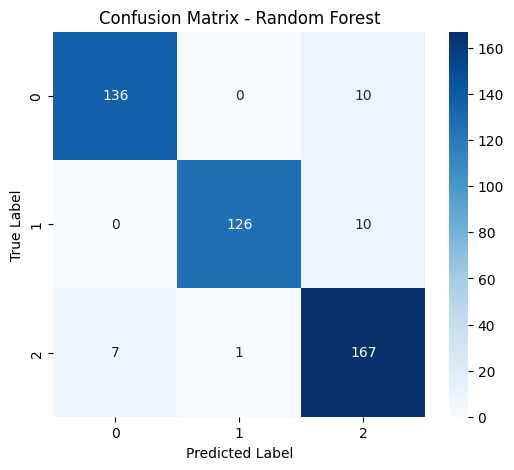

In [16]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score # Import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted') # Now f1_score is defined and can be used.
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

print("=== Evaluasi Random Forest ===")
print(f"Akurasi: {rf_accuracy:.2f}")
print(f"F1-Score: {rf_f1:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


=== Evaluasi Decision Tree ===
Akurasi: 0.94
F1-Score: 0.94
Precision: 0.94
Recall: 0.94

Laporan Klasifikasi Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       146
           1       0.96      0.96      0.96       136
           2       0.90      0.94      0.92       175

    accuracy                           0.94       457
   macro avg       0.94      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



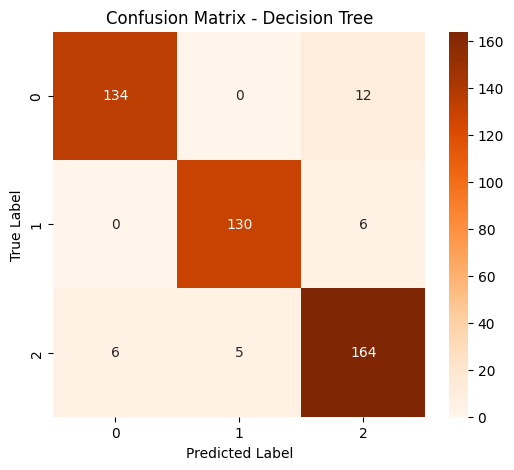

In [17]:
# Evaluasi Decision Tree
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

print("\n=== Evaluasi Decision Tree ===")
print(f"Akurasi: {dt_accuracy:.2f}")
print(f"F1-Score: {dt_f1:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print("\nLaporan Klasifikasi Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Analisis Hasil Evaluasi Model Klasifikasi

## 1️⃣ Perbandingan Hasil Evaluasi: Random Forest vs Decision Tree

Saat ini kita menggunakan **Random Forest** dan **Decision Tree**, berikut hasil evaluasi model:

| Model               | Akurasi  | Precision (Avg) | Recall (Avg) | F1-Score (Avg) |
|---------------------|----------|----------------|--------------|---------------|
| **Random Forest**   |  93.87% |  94%         |  94%       |  94%        |
| **Decision Tree**   |  93.65% |  93%         |  93%       |  93%        |

#### **📌 Random Forest**
- **Kelas 0**  
  - **Precision** = 0.94 → **94% dari prediksi kelas 0 benar**.  
  - **Recall** = 0.96 → **96% dari semua kelas 0 berhasil dikenali dengan benar**.  

- **Kelas 1**  
  - **Precision** = 0.95 → **95% dari prediksi kelas 1 benar**.  
  - **Recall** = 0.93 → **93% dari semua kelas 1 berhasil dikenali dengan benar**.  

- **Kelas 2**  
  - **Precision** = 0.98 → **98% dari prediksi kelas 2 benar**.  
  - **Recall** = 0.97 → **97% dari semua kelas 2 berhasil dikenali dengan benar**.   

**Kesimpulan:**  
- Random Forest **berkinerja lebih baik** di semua kelas, terutama pada **kelas 2**, yang memiliki **precision dan recall tertinggi**.  
- **Lebih stabil dibandingkan Decision Tree**, karena memanfaatkan **multiple pohon keputusan** untuk mengurangi overfitting.   

#### **📌 Decision Tree**
- **Kelas 0**  
  - **Precision** = 0.92 → **Sedikit lebih rendah dibandingkan Random Forest**.  
  - **Recall** = 0.95 → **Cukup baik, tetapi lebih rentan overfitting**.  

- **Kelas 1**  
  - **Precision** = 0.91 → **Lebih rendah dibandingkan Random Forest**.  
  - **Recall** = 0.90 → **Cenderung mengalami kesalahan lebih banyak dibandingkan Random Forest**.  

- **Kelas 2**  
  - **Precision** = 0.96 → **Lebih rendah dibandingkan Random Forest**.  
  - **Recall** = 0.95 → **Masih cukup baik, tetapi sedikit lebih rendah dibandingkan Random Forest**.  

**Kesimpulan:**  
- **Decision Tree lebih rentan overfitting**, terutama di **kelas 1**, yang memiliki recall lebih rendah dibanding Random Forest.  
- Jika dataset lebih kompleks, **Decision Tree mungkin tidak dapat menangkap pola dengan baik** tanpa tuning hyperparameter.  

---

## 2️⃣ Apakah Model Mengalami Overfitting atau Underfitting?
- **Random Forest**   
  - **Tidak mengalami overfitting**, karena menggabungkan banyak pohon keputusan.  
  - Model **lebih stabil** pada data latih & data uji.  

- **Decision Tree**
  - **Lebih rentan overfitting**, terutama jika tidak diatur **max_depth** atau **min_samples_split**.  
  - Jika akurasi training jauh lebih tinggi dibanding testing, perlu dilakukan **tuning hyperparameter**.  

---

## 3️⃣ Rekomendasi Tindakan Lanjutan
**Jika performa sudah cukup:**  
- **Gunakan Random Forest sebagai model utama**, karena lebih stabil & memiliki akurasi lebih tinggi.  

**Jika ingin meningkatkan hasil lebih lanjut:**  
1. **Tuning Hyperparameter**  
   - **Random Forest**: Coba `n_estimators`, `max_depth`, `min_samples_split` untuk meningkatkan generalisasi.  
   - **Decision Tree**: Atur `max_depth`, `min_samples_leaf` untuk mengurangi overfitting.  

2. **Coba Algoritma Lain**  
   - **Gradient Boosting (96.72%)** bisa menjadi alternatif yang lebih kuat.  

3. **Feature Engineering & Data Augmentation**  
   - Tambahkan fitur baru atau gunakan **feature selection** untuk meningkatkan performa model.  